Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

Estadísticas descriptivas:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      1

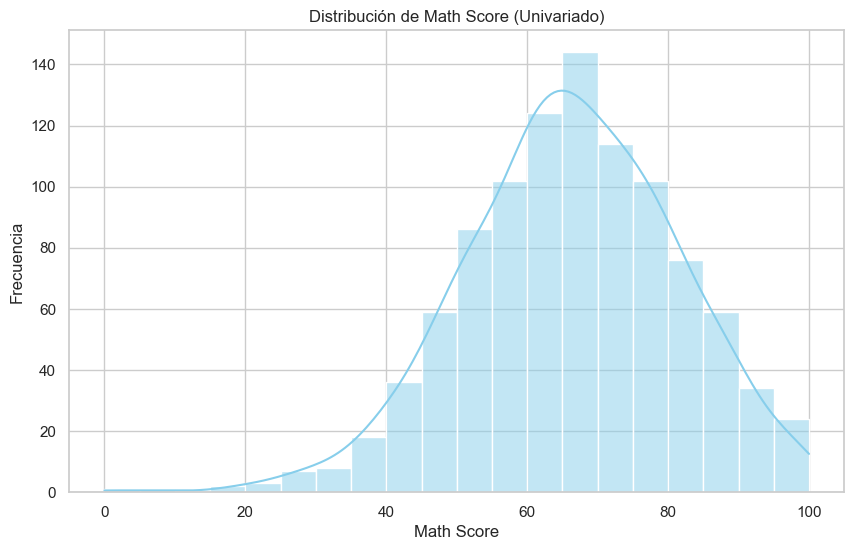

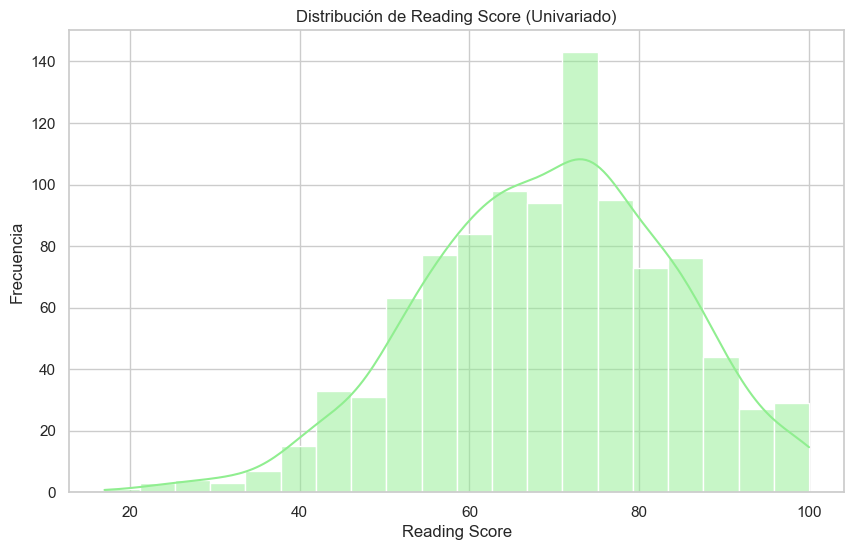

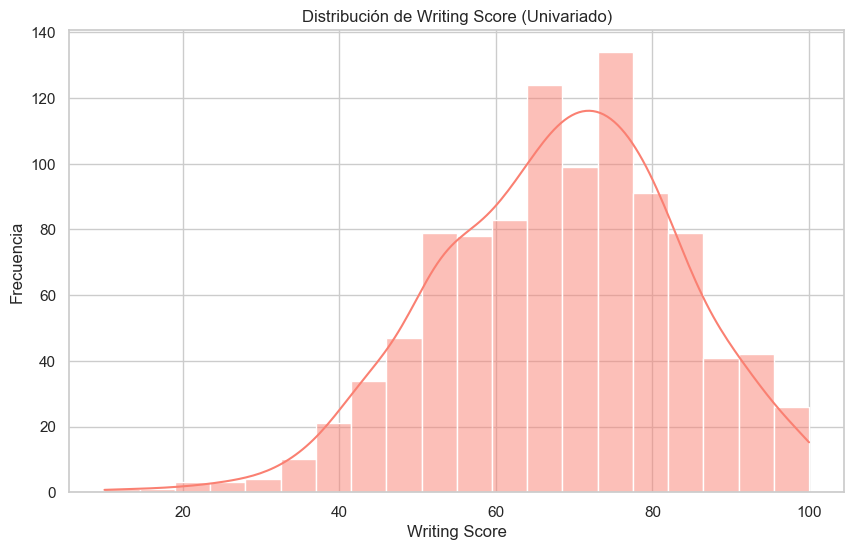

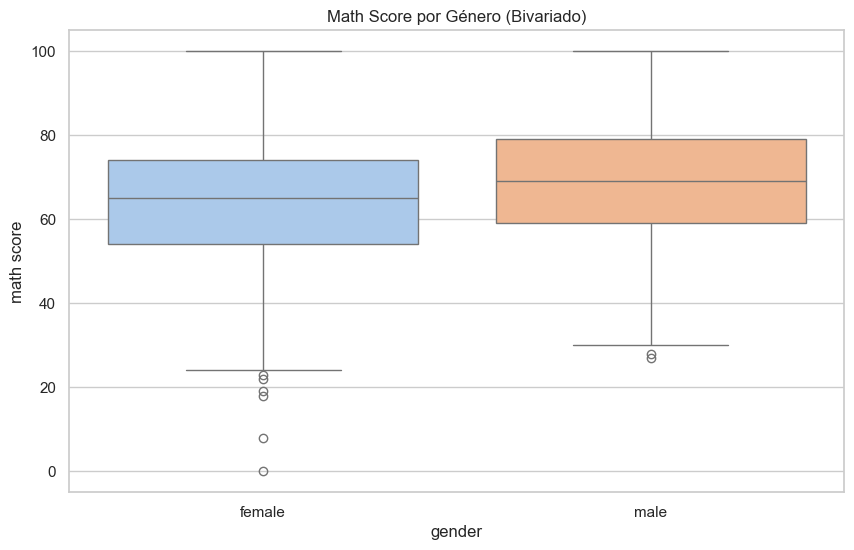

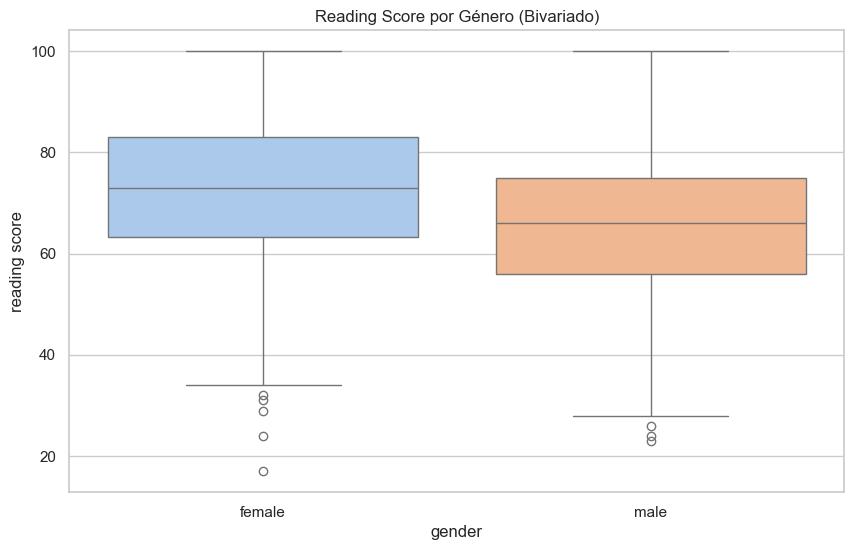

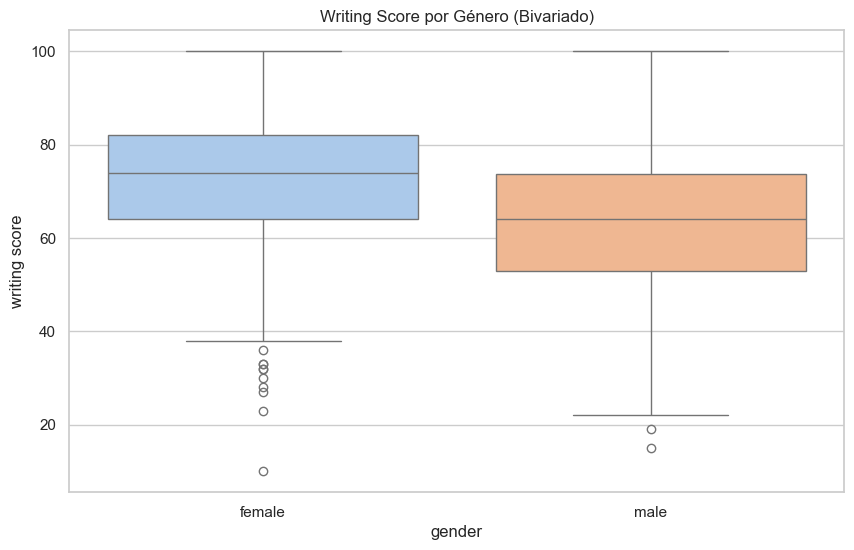

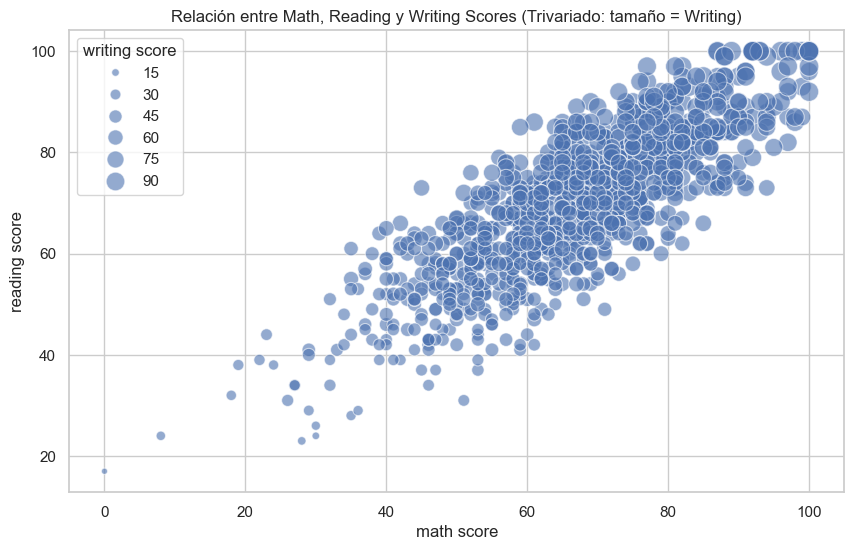

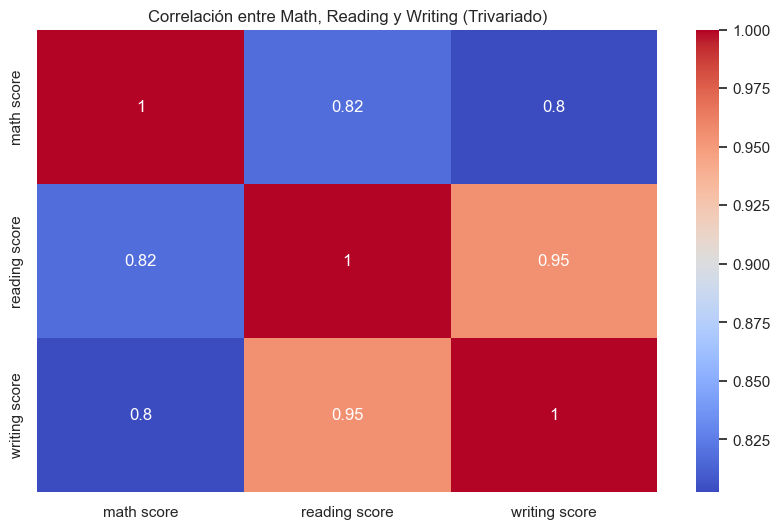

Porcentaje de estudiantes con Math Score >= 90: 5.80%

Promedio de Lectura, Escritura y Matemática por género:
        reading score  writing score  math score
gender                                          
female      72.608108      72.467181   63.633205
male        65.473029      63.311203   68.728216

Archivo promedio_por_genero.csv guardado en resultados/
PDF completo guardado en: ../resultados/analisis_completo.pdf


In [4]:
# ===============================
# PrimerEntrega_Analisis.ipynb
# ===============================

# ## Abstract: Análisis de Rendimiento Estudiantil
# El presente proyecto se centra en el análisis del conjunto de datos Students Performance in Exams, disponible en la plataforma Kaggle.
# Este dataset recopila información sobre el desempeño académico de 1000 estudiantes en tres asignaturas fundamentales: matemáticas, lectura y escritura.
# Además, contiene variables demográficas y contextuales como el género, el grupo étnico, el nivel educativo de los padres, el tipo de almuerzo recibido en la escuela y la participación en un curso de preparación para los exámenes.
# La combinación de estas variables permite explorar la relación entre características sociales, familiares y personales con los resultados académicos, lo cual constituye un insumo valioso para comprender mejor los factores que influyen en el rendimiento estudiantil.
#
# ## Preguntas de interés
# 1. ¿Existen diferencias significativas de rendimiento entre géneros?
# 2. ¿Influye la preparación previa en los puntajes?
# 3. ¿Qué relación existe entre matemáticas, lectura y escritura?
#
# ## Hipótesis
# 1. Las estudiantes femeninas tendrán un promedio mayor en lectura y escritura.
# 2. Los estudiantes que completaron el curso de preparación tendrán puntajes más altos.
# 3. Hay correlaciones positivas entre los tres tipos de puntajes.


# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# Dataset
dataset_path = "../data/StudentsPerformance.csv"
df = pd.read_csv(dataset_path)

# Información general
print("Información del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Comprobar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# ==================================================
# Visualizaciones Univariadas
# ==================================================
# Distribución de cada calificación (una variable a la vez)

plt.figure()
sns.histplot(df['math score'], kde=True, bins=20, color='skyblue')
plt.title('Distribución de Math Score (Univariado)')
plt.xlabel('Math Score')
plt.ylabel('Frecuencia')
plt.show()

plt.figure()
sns.histplot(df['reading score'], kde=True, bins=20, color='lightgreen')
plt.title('Distribución de Reading Score (Univariado)')
plt.xlabel('Reading Score')
plt.ylabel('Frecuencia')
plt.show()

plt.figure()
sns.histplot(df['writing score'], kde=True, bins=20, color='salmon')
plt.title('Distribución de Writing Score (Univariado)')
plt.xlabel('Writing Score')
plt.ylabel('Frecuencia')
plt.show()


# ==================================================
# Visualizaciones Bivariadas
# ==================================================
# Comparar puntajes por género (relación entre una categórica y una numérica)

plt.figure()
sns.boxplot(x='gender', y='math score', hue='gender', data=df, palette='pastel', dodge=False, legend=False)
plt.title('Math Score por Género (Bivariado)')
plt.show()

plt.figure()
sns.boxplot(x='gender', y='reading score', hue='gender', data=df, palette='pastel', dodge=False, legend=False)
plt.title('Reading Score por Género (Bivariado)')
plt.show()

plt.figure()
sns.boxplot(x='gender', y='writing score', hue='gender', data=df, palette='pastel', dodge=False, legend=False)
plt.title('Writing Score por Género (Bivariado)')
plt.show()


# ==================================================
# Visualizaciones Trivariadas
# ==================================================
# Relación entre math y reading, usando el tamaño para representar writing

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='math score',
    y='reading score',
    size='writing score',
    sizes=(20, 200),
    data=df,
    alpha=0.6
)
plt.title('Relación entre Math, Reading y Writing Scores (Trivariado: tamaño = Writing)')
plt.show()

# Correlación entre las tres calificaciones (otra forma de verlo)
plt.figure()
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Math, Reading y Writing (Trivariado)')
plt.show()


# ==================================================
# Insights básicos
# ==================================================
# Porcentaje de estudiantes con puntaje >= 90 en Math
high_math = (df['math score'] >= 90).mean() * 100
print(f"Porcentaje de estudiantes con Math Score >= 90: {high_math:.2f}%")

# Media de Reading, Writing y Math por género
avg_scores_gender = df.groupby('gender')[['reading score','writing score','math score']].mean()
print("\nPromedio de Lectura, Escritura y Matemática por género:")
print(avg_scores_gender)

# ==================================================
# Guardado de resultados
# ==================================================
# Promedio de calificaciones por género
avg_scores_gender.to_csv("../resultados/promedio_por_genero.csv", index=True)
print("\nArchivo promedio_por_genero.csv guardado en resultados/")

# Guardado de gráficos en PDF
from matplotlib.backends.backend_pdf import PdfPages

pdf_path = "../resultados/analisis_completo.pdf"

with PdfPages(pdf_path) as pdf:
    
    # Univariados
    plt.figure(figsize=(10,6))
    sns.histplot(df['math score'], kde=True, bins=20, color='skyblue')
    plt.title('Distribución de Math Score (Univariado)')
    pdf.savefig(); plt.close()

    plt.figure(figsize=(10,6))
    sns.histplot(df['reading score'], kde=True, bins=20, color='lightgreen')
    plt.title('Distribución de Reading Score (Univariado)')
    pdf.savefig(); plt.close()

    plt.figure(figsize=(10,6))
    sns.histplot(df['writing score'], kde=True, bins=20, color='salmon')
    plt.title('Distribución de Writing Score (Univariado)')
    pdf.savefig(); plt.close()
    
    # Bivariados
    plt.figure(figsize=(10,6))
    sns.boxplot(x='gender', y='math score', hue='gender', data=df, palette='pastel', dodge=False, legend=False)
    plt.title('Math Score por Género (Bivariado)')
    pdf.savefig(); plt.close()

    plt.figure(figsize=(10,6))
    sns.boxplot(x='gender', y='reading score', hue='gender', data=df, palette='pastel', dodge=False, legend=False)
    plt.title('Reading Score por Género (Bivariado)')
    pdf.savefig(); plt.close()

    plt.figure(figsize=(10,6))
    sns.boxplot(x='gender', y='writing score', hue='gender', data=df, palette='pastel', dodge=False, legend=False)
    plt.title('Writing Score por Género (Bivariado)')
    pdf.savefig(); plt.close()
    
    # Trivariados
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        x='math score',
        y='reading score',
        size='writing score',
        sizes=(20, 200),
        data=df,
        alpha=0.6
    )
    plt.title('Relación entre Math, Reading y Writing Scores (Trivariado)')
    pdf.savefig(); plt.close()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlación entre calificaciones (Trivariado)')
    pdf.savefig(); plt.close()

print(f"PDF completo guardado en: {pdf_path}")
